In [1]:
import descartes
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from shapely.geometry import Point, Polygon

In [28]:
"""https://geopandas.org/en/stable/gallery/cartopy_convert.html"""

'https://geopandas.org/en/stable/gallery/cartopy_convert.html'

In [2]:
df = pd.read_csv("worldmap_creoles_color.csv", 
                 usecols=["Language", "Lat", "Lon", "Before","After", "b_color", "a_color"])
df.head()

,Language,Lon,Lat,b_color,a_color,Before,After
0,Saint Lucian Creole French (Patwa),13.9094,-60.9789,silver,lemonchiffon,0,1
1,Bislama (Bichelamar),-17.7333,168.3273,lemonchiffon,orange,1,3
2,Belize Kriol,17.2510,-88.7590,silver,lemonchiffon,0,1
3,Chavacano,6.9214,122.0790,navajowhite,red,2,4
4,Seychellois Creole (Seselwa Creole French),-4.6796,55.4920,silver,lemonchiffon,0,1


In [3]:
geometry = [Point(xy) for xy in zip(df["Lat"], df["Lon"])]
geometry[:3]

[<POINT (-60.979 13.909)>, <POINT (168.327 -17.733)>, <POINT (-88.759 17.251)>]

In [4]:
geo_df = gpd.GeoDataFrame(df, geometry=geometry)
geo_df.head()

,Language,Lon,Lat,b_color,a_color,Before,After,geometry
0,Saint Lucian Creole French (Patwa),13.9094,-60.9789,silver,lemonchiffon,0,1,POINT (-60.97890 13.90940)
1,Bislama (Bichelamar),-17.7333,168.3273,lemonchiffon,orange,1,3,POINT (168.32730 -17.73330)
2,Belize Kriol,17.2510,-88.7590,silver,lemonchiffon,0,1,POINT (-88.75900 17.25100)
3,Chavacano,6.9214,122.0790,navajowhite,red,2,4,POINT (122.07900 6.92140)
4,Seychellois Creole (Seselwa Creole French),-4.6796,55.4920,silver,lemonchiffon,0,1,POINT (55.49200 -4.67960)


In [5]:
geo_df = geo_df.set_crs("EPSG:4326")

In [6]:
print(geo_df.crs)

EPSG:4326


In [7]:
# This loads the regular map
path = gpd.datasets.get_path('naturalearth_lowres')
map_df = gpd.read_file(path)

# Add a column we'll use later
# map_df['gdp_pp'] = map_df['gdp_md_est'] / map_df['pop_est']

# This defines the coordinate system
# Define the CartoPy CRS object.
crs = ccrs.AzimuthalEquidistant()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init

df_ae = map_df.to_crs(crs_proj4) #puts our basic map through some transformation ... 
#df_ae.head()
#Here's what the plot looks like in GeoPandas
#df_ae.plot()

In [8]:
print(map_df.crs)

epsg:4326


In [9]:
df_transformed = geo_df.to_crs(crs_proj4)


In [10]:
print(geo_df.crs)
print(map_df.crs)
print("#"*10)
print(df_transformed.crs)
print(df_ae.crs)

EPSG:4326
epsg:4326
##########
+proj=aeqd +ellps=WGS84 +lon_0=0.0 +lat_0=0.0 +x_0=0.0 +y_0=0.0 +no_defs +type=crs
+proj=aeqd +ellps=WGS84 +lon_0=0.0 +lat_0=0.0 +x_0=0.0 +y_0=0.0 +no_defs +type=crs


In [11]:
geo_df.head()

,Language,Lon,Lat,b_color,a_color,Before,After,geometry
0,Saint Lucian Creole French (Patwa),13.9094,-60.9789,silver,lemonchiffon,0,1,POINT (-60.97890 13.90940)
1,Bislama (Bichelamar),-17.7333,168.3273,lemonchiffon,orange,1,3,POINT (168.32730 -17.73330)
2,Belize Kriol,17.2510,-88.7590,silver,lemonchiffon,0,1,POINT (-88.75900 17.25100)
3,Chavacano,6.9214,122.0790,navajowhite,red,2,4,POINT (122.07900 6.92140)
4,Seychellois Creole (Seselwa Creole French),-4.6796,55.4920,silver,lemonchiffon,0,1,POINT (55.49200 -4.67960)


<AxesSubplot:>

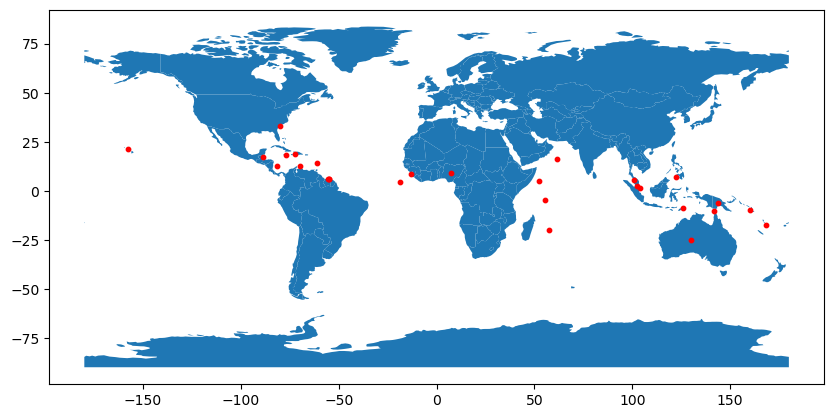

In [30]:
geo_df.plot(ax = map_df.plot(figsize = (10, 10)), color = 'red', markersize = 10)

In [27]:
blah = df_transformed.plot(ax = , color = df_transformed["b_color"], markersize = 50)


SyntaxError: invalid syntax (969364970.py, line 1)

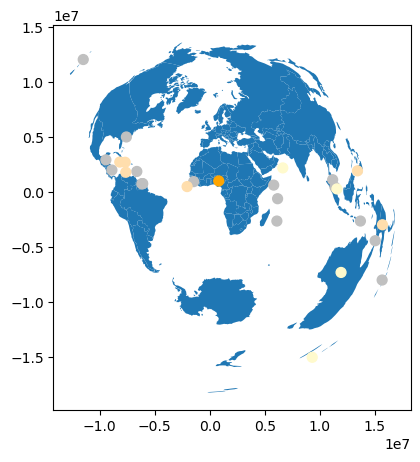

In [25]:
hello = df_transformed.plot(ax = df_ae.plot(figsize = (5, 5)), color = df_transformed["b_color"], markersize = 50)


<AxesSubplot:>

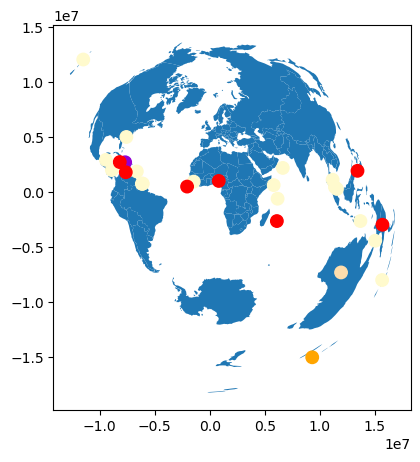

In [31]:
df_transformed.plot(ax = df_ae.plot(figsize = (5, 5)), color = df_transformed["a_color"], markersize = 80)